#**USING NLP**

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
df = pd.read_excel('/content/SALE 2022 (1).xlsx')
df.head()

,BillDate,ProductGroup,ProductSubGroup,Product,Brand,Size,Design,Colour,Mrp,SalePrice,QTY
0,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,24,NO DESIGN,NO COLOR,580.0,580.0,1.0
1,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,30,SUNFLOWER,RED,690.0,690.0,1.0
2,2022-04-01,BOYS WEAR,BOYS NIGHT WEAR,BOYS NIGHT DRESS,COMFORT,32,A-8152,NO COLOR,625.0,625.0,1.0
3,2022-04-01,BOYS WEAR,BOYS NIGHT WEAR,BOYS SHORTS,BISKID,28,21405,NO COLOR,379.0,379.0,1.0
4,2022-04-01,BOYS WEAR,BOYS NIGHT WEAR,BOYS SHORTS,WHAOU,32,S20294-12Y,NO COLOR,299.0,299.0,1.0


In [175]:
df.describe()

,BillDate,Mrp,SalePrice,QTY
count,118677,118677.000000,118677.000000,118678.000000
mean,2023-08-28 15:39:31.091281664,505.715548,467.033535,2.877091
min,2022-04-01 00:00:00,1.000000,0.000000,-8.000000
25%,2022-11-05 00:00:00,225.000000,220.000000,1.000000
50%,2023-08-09 00:00:00,400.000000,375.000000,1.000000
75%,2024-06-13 00:00:00,629.000000,550.000000,1.000000
max,2025-03-25 00:00:00,3800.000000,3800.000000,170723.709000
std,NaN,427.556846,394.589408,495.572531


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118678 entries, 0 to 118677
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BillDate         118677 non-null  datetime64[ns]
 1   ProductGroup     118677 non-null  object        
 2   ProductSubGroup  118677 non-null  object        
 3   Product          118677 non-null  object        
 4   Brand            118677 non-null  object        
 5   Size             118675 non-null  object        
 6   Design           118676 non-null  object        
 7   Colour           118676 non-null  object        
 8   Mrp              118677 non-null  float64       
 9   SalePrice        118677 non-null  float64       
 10  QTY              118678 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 10.0+ MB


In [186]:
df.isna().sum()

,0
BillDate,1
ProductGroup,1
ProductSubGroup,1
Product,1
Brand,1
Size,3
Design,2
Colour,2
Mrp,1
SalePrice,1


In [187]:
for x in ['BillDate','ProductGroup','ProductSubGroup','Product','Brand','Size','Design','Colour','Mrp','SalePrice']:
  df[x].dropna(inplace=True)

<Axes: >

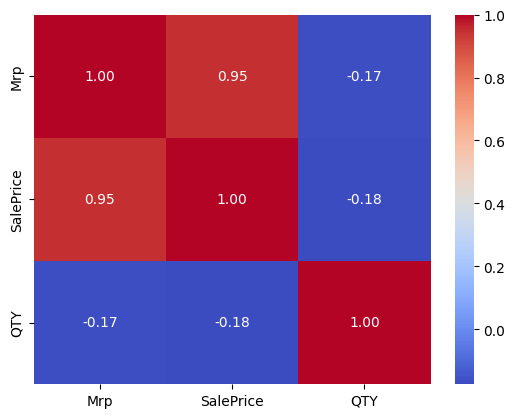

In [188]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt=".2f")

In [189]:
df.drop(columns=['Mrp'], inplace=True)
df.head(2)

,BillDate,ProductGroup,ProductSubGroup,Product,Brand,Size,Design,Colour,SalePrice,QTY
0,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,24,NO DESIGN,NO COLOR,580.0,1.0
1,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,30,SUNFLOWER,RED,690.0,1.0


In [190]:
df.drop(columns=['Design','Colour','Size'], inplace=True)
df.shape

(118678, 7)

In [191]:
df['BillDate'][0]

df['BillDate'] = pd.to_datetime(df['BillDate'])
df['Month'] = df['BillDate'].dt.to_period('M').astype(str)

df['BillDate'] = pd.to_datetime(df['BillDate'])
df['MonthNum'] = df['BillDate'].dt.year * 12 + df['BillDate'].dt.month

df.head(2)

,BillDate,ProductGroup,ProductSubGroup,Product,Brand,SalePrice,QTY,Month,MonthNum
0,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,580.0,1.0,2022-04,24268.0
1,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,690.0,1.0,2022-04,24268.0


In [192]:
df = df[df['QTY'] >=1]

In [193]:
df.head()

,BillDate,ProductGroup,ProductSubGroup,Product,Brand,SalePrice,QTY,Month,MonthNum
0,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,580.0,1.0,2022-04,24268.0
1,2022-04-01,BOYS WEAR,BOYS ETHNIC WEAR,BOYS KURTA PYJAMA,GANGAR,690.0,1.0,2022-04,24268.0
2,2022-04-01,BOYS WEAR,BOYS NIGHT WEAR,BOYS NIGHT DRESS,COMFORT,625.0,1.0,2022-04,24268.0
3,2022-04-01,BOYS WEAR,BOYS NIGHT WEAR,BOYS SHORTS,BISKID,379.0,1.0,2022-04,24268.0
4,2022-04-01,BOYS WEAR,BOYS NIGHT WEAR,BOYS SHORTS,WHAOU,299.0,1.0,2022-04,24268.0


In [194]:
df.drop(columns = ['ProductGroup', 'ProductSubGroup'], axis = 1, inplace = True)

In [195]:
df.head()

,BillDate,Product,Brand,SalePrice,QTY,Month,MonthNum
0,2022-04-01,BOYS KURTA PYJAMA,GANGAR,580.0,1.0,2022-04,24268.0
1,2022-04-01,BOYS KURTA PYJAMA,GANGAR,690.0,1.0,2022-04,24268.0
2,2022-04-01,BOYS NIGHT DRESS,COMFORT,625.0,1.0,2022-04,24268.0
3,2022-04-01,BOYS SHORTS,BISKID,379.0,1.0,2022-04,24268.0
4,2022-04-01,BOYS SHORTS,WHAOU,299.0,1.0,2022-04,24268.0


In [196]:
df.drop('Brand', axis=1, inplace=True)

In [35]:
df.drop('MonthNum', axis = 1, inplace=True)

In [25]:
import pandas as pd

price_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, df['SalePrice'].max()]
price_labels = ['0-500', '500-1000', '1000-1500', '1500-2000',
                '2000-2500', '2500-3000', '3000-3500', '3500+']

df['PriceBucket'] = pd.cut(df['SalePrice'], bins=price_bins, labels=price_labels, include_lowest=True)

In [26]:
df.head(2)

,BillDate,Product,SalePrice,QTY,PriceBucket
0,2022-04-01,BOYS KURTA PYJAMA,580.0,1.0,500-1000
1,2022-04-01,BOYS KURTA PYJAMA,690.0,1.0,500-1000


In [27]:
df.drop('SalePrice', axis=1, inplace=True)

In [28]:
df.describe()

,BillDate,QTY
count,118677,118678.000000
mean,2023-08-28 15:39:31.091281664,2.877091
min,2022-04-01 00:00:00,-8.000000
25%,2022-11-05 00:00:00,1.000000
50%,2023-08-09 00:00:00,1.000000
75%,2024-06-13 00:00:00,1.000000
max,2025-03-25 00:00:00,170723.709000
std,NaN,495.572531


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116169 entries, 0 to 118677
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   BillDate     116168 non-null  datetime64[ns]
 1   Product      116168 non-null  object        
 2   QTY          116169 non-null  float64       
 3   PriceBucket  116168 non-null  category      
 4   Month        116169 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 4.5+ MB


In [37]:
row = df['QTY'] == 170723.709000

In [38]:
row = df[df['QTY'] == 170723.709000]

In [39]:
len(row)

0

In [40]:
df.tail()

,BillDate,Product,QTY,PriceBucket,Month
118673,2025-03-25,SLIPS,2.000,0-500,2025-03
118674,2025-03-25,SLIPS,2.000,0-500,2025-03
118675,2025-03-25,LADIES HARAM PANTS,1.000,0-500,2025-03
118676,2025-03-25,LADIES TSHIRTS,1.000,0-500,2025-03
118677,NaT,NaN,170723.709,NaN,NaT


In [41]:
df = df.iloc[:-1]

In [42]:
df.drop('Month', axis=1, inplace=True)

In [43]:
df.tail()

,BillDate,Product,QTY,PriceBucket
118672,2025-03-25,LADIES LEGGINGS,1.0,0-500
118673,2025-03-25,SLIPS,2.0,0-500
118674,2025-03-25,SLIPS,2.0,0-500
118675,2025-03-25,LADIES HARAM PANTS,1.0,0-500
118676,2025-03-25,LADIES TSHIRTS,1.0,0-500


In [44]:
df.describe()

,BillDate,QTY
count,116168,116168.000000
mean,2023-08-27 12:13:30.687969024,1.487946
min,2022-04-01 00:00:00,1.000000
25%,2022-11-04 00:00:00,1.000000
50%,2023-08-07 00:00:00,1.000000
75%,2024-06-13 00:00:00,1.000000
max,2025-03-25 00:00:00,72.000000
std,NaN,1.538483


In [45]:
df.isna().sum()

,0
BillDate,0
Product,0
QTY,0
PriceBucket,0


In [46]:
df['BillDate'] = pd.to_datetime(df['BillDate'])
df['Year'] = df['BillDate'].dt.year
df['Month'] = df['BillDate'].dt.month

In [47]:
df.head()

,BillDate,Product,QTY,PriceBucket,Year,Month
0,2022-04-01,BOYS KURTA PYJAMA,1.0,500-1000,2022,4
1,2022-04-01,BOYS KURTA PYJAMA,1.0,500-1000,2022,4
2,2022-04-01,BOYS NIGHT DRESS,1.0,500-1000,2022,4
3,2022-04-01,BOYS SHORTS,1.0,0-500,2022,4
4,2022-04-01,BOYS SHORTS,1.0,0-500,2022,4


In [48]:
df['YearMonth'] = df['BillDate'].dt.to_period('M').astype(str)

In [49]:
df.drop(columns = ['Year', 'Month'], axis = 1, inplace=True)

In [50]:
df.head()

,BillDate,Product,QTY,PriceBucket,YearMonth
0,2022-04-01,BOYS KURTA PYJAMA,1.0,500-1000,2022-04
1,2022-04-01,BOYS KURTA PYJAMA,1.0,500-1000,2022-04
2,2022-04-01,BOYS NIGHT DRESS,1.0,500-1000,2022-04
3,2022-04-01,BOYS SHORTS,1.0,0-500,2022-04
4,2022-04-01,BOYS SHORTS,1.0,0-500,2022-04


In [51]:
df_group = df.groupby(['YearMonth', 'Product', 'PriceBucket'])['QTY'].sum().reset_index()

<ipython-input-51-2497452868>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df.groupby(['YearMonth', 'Product', 'PriceBucket'])['QTY'].sum().reset_index()


In [52]:
df_group.head()

,YearMonth,Product,PriceBucket,QTY
0,2022-04,ADVOCATE GOWNS,0-500,0.0
1,2022-04,ADVOCATE GOWNS,500-1000,0.0
2,2022-04,ADVOCATE GOWNS,1000-1500,0.0
3,2022-04,ADVOCATE GOWNS,1500-2000,0.0
4,2022-04,ADVOCATE GOWNS,2000-2500,0.0


In [53]:
len(df_group)

65376

In [54]:
df_group = df_group[df_group['QTY'] > 0]

In [55]:
len(df_group)

8922

In [56]:
df_group.head(10)

,YearMonth,Product,PriceBucket,QTY
8,2022-04,BABY 3/4TH,0-500,8.0
16,2022-04,BABY ACCESSORIES,0-500,1.0
24,2022-04,BABY BEDS,0-500,2.0
32,2022-04,BABY BOYS PAIRS,0-500,68.0
33,2022-04,BABY BOYS PAIRS,500-1000,6.0
34,2022-04,BABY BOYS PAIRS,1000-1500,9.0
35,2022-04,BABY BOYS PAIRS,1500-2000,2.0
40,2022-04,BABY C.FROCKS,0-500,20.0
41,2022-04,BABY C.FROCKS,500-1000,16.0
49,2022-04,BABY FROCK,500-1000,5.0


In [57]:
df_group['ProductTokens'] = df_group['Product'].str.lower().str.split()

In [58]:
df_group.head(2)

,YearMonth,Product,PriceBucket,QTY,ProductTokens
8,2022-04,BABY 3/4TH,0-500,8.0,"[baby, 3/4th]"
16,2022-04,BABY ACCESSORIES,0-500,1.0,"[baby, accessories]"


In [67]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [145]:
from gensim.models import Word2Vec

sentences = df_group['ProductTokens'].tolist()

model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

In [222]:
model.save("product_word2vec.model")

In [146]:
import numpy as np

def get_product_vector(tokens):
    return np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)

df_group['ProductVec'] = df_group['ProductTokens'].apply(get_product_vector)


In [147]:
df_group.head()

,YearMonth,Product,PriceBucket,QTY,ProductTokens,ProductVec,Price,Year,Month
8,2022-04-01,BABY 3/4TH,0-500,8.0,"[baby, 3/4th]","[-0.04143286, 0.012110855, -0.0004926913, 0.01...",250.0,2022,4
16,2022-04-01,BABY ACCESSORIES,0-500,1.0,"[baby, accessories]","[-0.04064324, 0.009788344, 0.008698007, 0.0179...",250.0,2022,4
24,2022-04-01,BABY BEDS,0-500,2.0,"[baby, beds]","[-0.039933212, 0.024323087, -0.006491243, 0.01...",250.0,2022,4
32,2022-04-01,BABY BOYS PAIRS,0-500,68.0,"[baby, boys, pairs]","[-0.064735286, 0.035616953, 0.0023769415, 0.01...",250.0,2022,4
33,2022-04-01,BABY BOYS PAIRS,500-1000,6.0,"[baby, boys, pairs]","[-0.064735286, 0.035616953, 0.0023769415, 0.01...",750.0,2022,4


In [65]:
len(df_group['ProductVec'].iloc[1])
# Len of each vectors.

50

In [70]:
def price_bucket_to_mid(bucket):
    if '+' in bucket:
        return int(bucket.replace('+', '')) + 250
    else:
        low, high = map(int, bucket.split('-'))
        return (low + high) / 2

df_group['Price'] = df_group['PriceBucket'].apply(price_bucket_to_mid)

In [79]:
df_group['YearMonth'] = pd.to_datetime(df_group['YearMonth'], format='%Y-%m')

In [81]:
df.head()

,BillDate,Product,QTY,PriceBucket,YearMonth,Year,Month
0,2022-04-01,BOYS KURTA PYJAMA,1.0,500-1000,2022-04,2022,4
1,2022-04-01,BOYS KURTA PYJAMA,1.0,500-1000,2022-04,2022,4
2,2022-04-01,BOYS NIGHT DRESS,1.0,500-1000,2022-04,2022,4
3,2022-04-01,BOYS SHORTS,1.0,0-500,2022-04,2022,4
4,2022-04-01,BOYS SHORTS,1.0,0-500,2022-04,2022,4


In [82]:
train_df = df_group[df_group['YearMonth'] <= '2024-12-31']

# Test: All rows where YearMonth ≥ 2025-01 and ≤ 2025-03
test_df = df_group[
    (df_group['YearMonth'] >= '2025-01-01') &
    (df_group['YearMonth'] <= '2025-03-31')
]

In [104]:
train_df.shape

(8258, 9)

In [128]:
X_train = np.hstack([
    train_df[['Year', 'Month', 'Price']].values,
    np.stack(train_df['ProductVec'].values)
])

y_train = train_df['QTY'].values

X_test = np.hstack([
    test_df[['Year', 'Month', 'Price']].values,
    np.stack(test_df['ProductVec'].values)
])

y_test = test_df['QTY'].values


In [129]:
X_train.shape, X_test.shape, y_train.shape

((8258, 53), (664, 53), (8258,))

In [206]:
X_train[0]

array([ 2.02200000e+03,  4.00000000e+00,  2.50000000e+02, -4.07513753e-02,
        1.11806579e-02, -2.44993251e-04,  1.37136746e-02,  1.04308076e-01,
       -2.37954438e-01,  5.80321215e-02,  2.34803587e-01, -1.69076025e-01,
        2.29223371e-02, -4.76906747e-02, -8.89291763e-02, -8.40325207e-02,
        1.58186629e-02,  3.59087214e-02,  3.30922194e-04,  9.57018957e-02,
        6.15228526e-02, -1.09161586e-01,  3.11669353e-02,  9.64153279e-03,
        1.46034315e-01,  1.15162022e-01, -1.49235576e-01,  1.41642034e-01,
       -6.60843356e-03, -4.87842225e-02,  1.06987014e-01, -6.47579283e-02,
       -2.30590012e-02, -2.08265521e-02, -1.18149407e-01, -3.71229760e-02,
       -3.23431380e-02, -1.77278429e-01,  3.91685776e-02,  1.16964214e-01,
       -1.91887468e-02,  1.82958156e-01,  9.67499614e-03,  6.97207302e-02,
        4.16607857e-02,  4.91294824e-02, -3.59205045e-02,  2.61000276e-01,
        2.35627778e-02, -1.00495689e-01, -1.30075347e-02,  1.32415339e-01,
        3.96330096e-03])

In [131]:
print(train_df['YearMonth'].min(), 'to', train_df['YearMonth'].max())
print(test_df['YearMonth'].min(), 'to', test_df['YearMonth'].max())

2022-04-01 00:00:00 to 2024-12-01 00:00:00
2025-01-01 00:00:00 to 2025-03-01 00:00:00


In [148]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [149]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = rfr_model.predict(X_train)

print("Train RMSE:", mean_squared_error(y_train, y_pred_train))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train R²:", r2_score(y_train, y_pred_train))


Train RMSE: 268.539068588607
Train MAE: 3.5635477149430854
Train R²: 0.9595537348131542


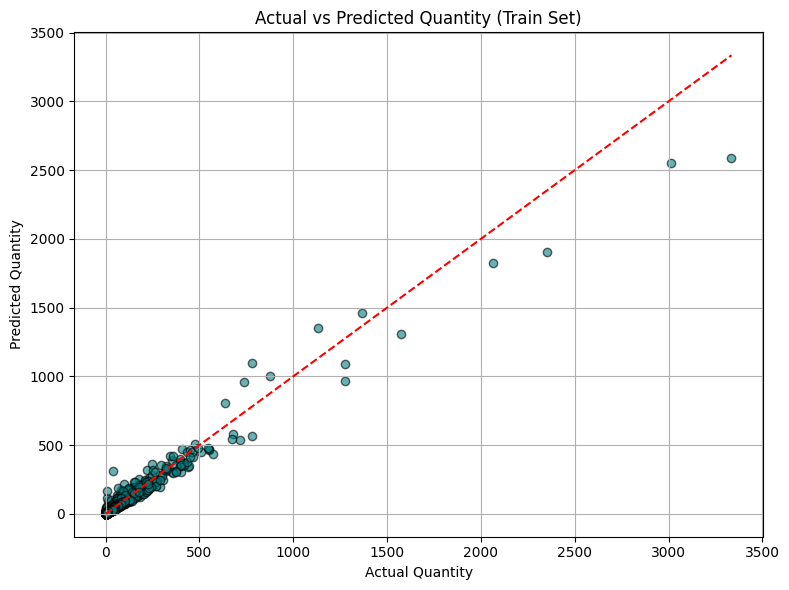

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Train Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rfr_model.predict(X_test)

print("Test RMSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Test RMSE: 128.77014522446117
Test MAE: 6.645869006024095
Test R²: 0.8355980584138393


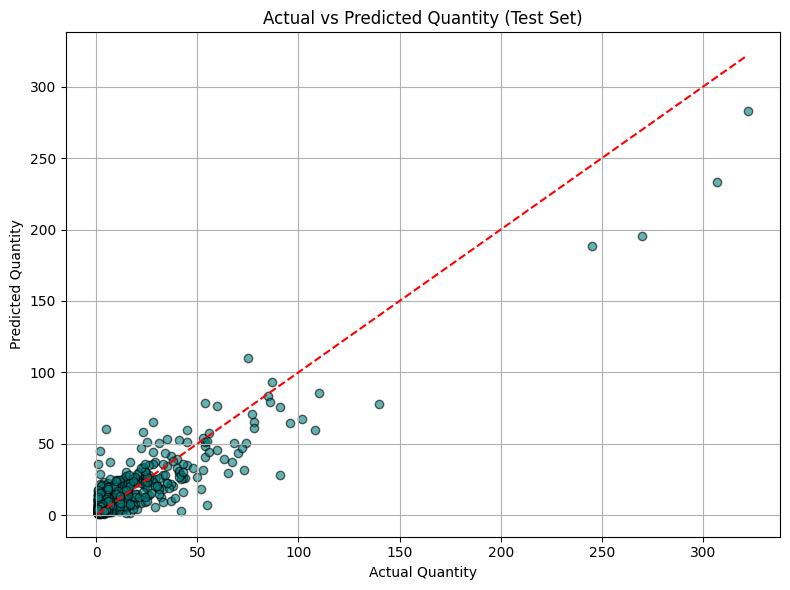

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

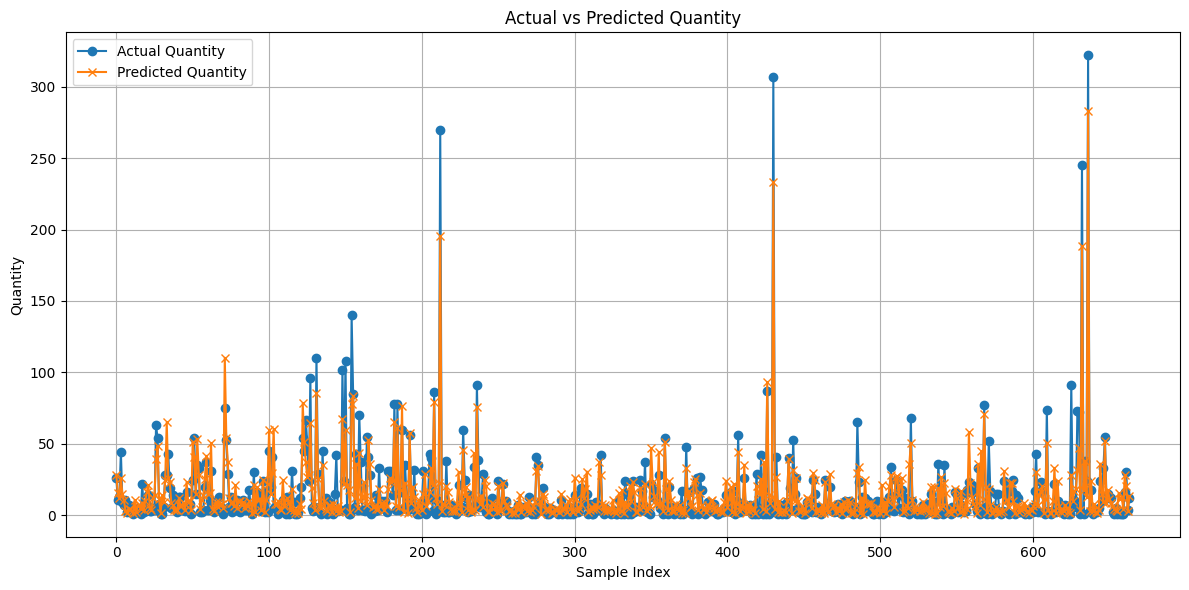

In [139]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

plt.plot(y_test, label='Actual Quantity', marker='o')
plt.plot(y_pred, label='Predicted Quantity', marker='x')
plt.title('Actual vs Predicted Quantity')
plt.xlabel('Sample Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("XGBoost Test RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Test MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost Test R²:", r2_score(y_test, y_pred_xgb))

XGBoost Test RMSE: 146.72388553757887
XGBoost Test MAE: 7.238937358200618
XGBoost Test R²: 0.8126763651823434


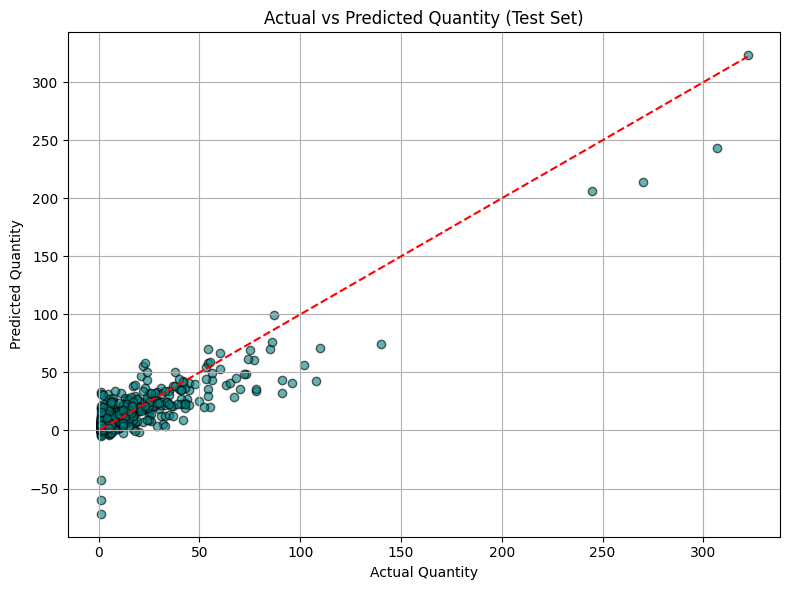

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [203]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Test RMSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression Test MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression Test R²:", r2_score(y_test, y_pred_lr))

Linear Regression Test RMSE: 1027.6646471520774
Linear Regression Test MAE: 21.66387472771864
Linear Regression Test R²: -0.3120282111723869


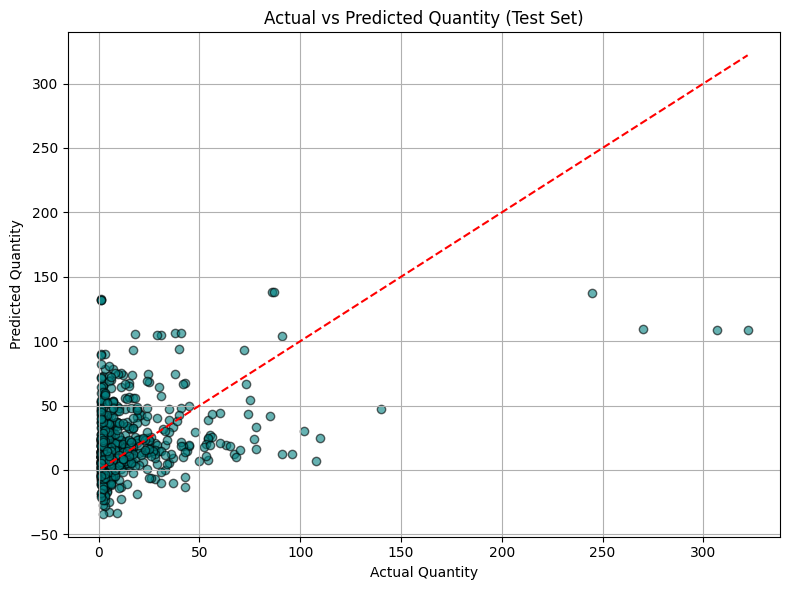

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [207]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr_model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1)
)

In [208]:
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("SVR Test MAE:", mean_absolute_error(y_test, y_pred_svr))
print("SVR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("SVR Test R²:", r2_score(y_test, y_pred_svr))

SVR Test MAE: 9.298847647787097
SVR Test RMSE: 18.846258772039327
SVR Test R²: 0.546536791328766


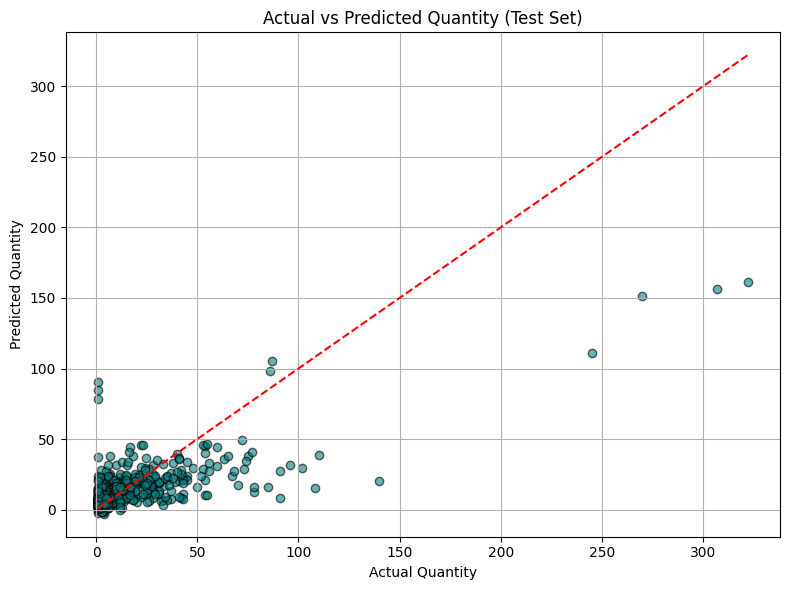

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [210]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: {mae:.2f}")
print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"Decision Tree R²: {r2:.4f}")


Decision Tree MAE: 8.66
Decision Tree RMSE: 14.31
Decision Tree R²: 0.7386


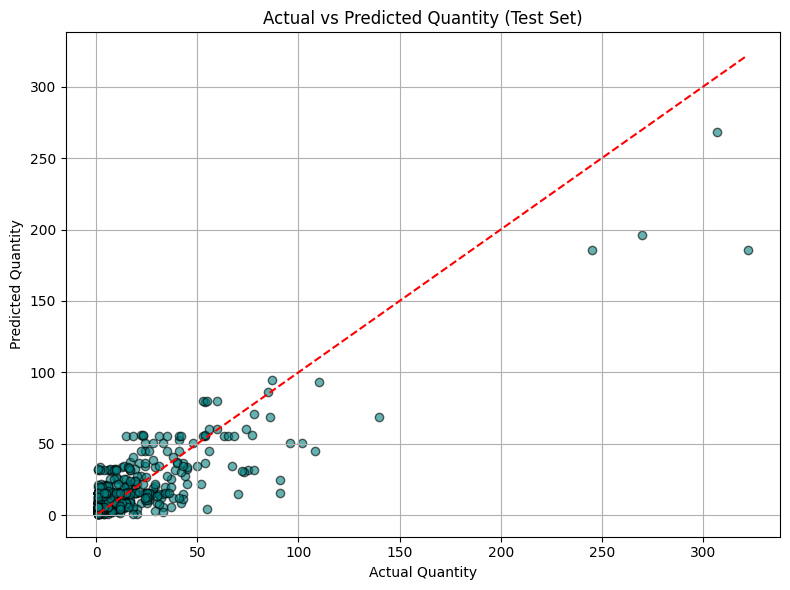

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [214]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2 = r2_score(y_test, y_pred_knn)

print(f"KNN MAE: {mae:.2f}")
print(f"KNN RMSE: {rmse:.2f}")
print(f"KNN R²: {r2:.4f}")

KNN MAE: 13.16
KNN RMSE: 25.94
KNN R²: 0.1413


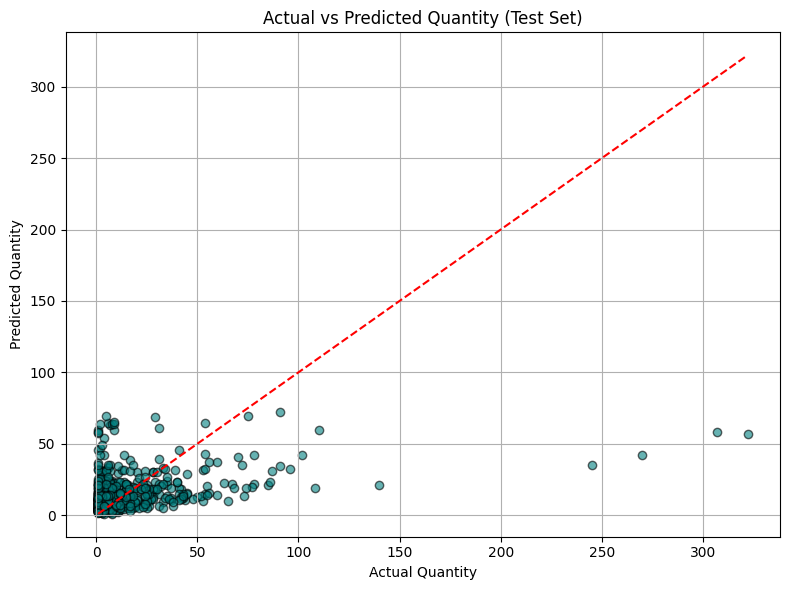

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

Predicting for New **Input**

In [179]:
def predict_new_input(input):
  mid_price = price_bucket_to_mid(input['price_bucket'])
  product = input['product']
  tokens = product.lower().split()
  product_vector = get_product_vector(tokens)
  numeric_features = np.array([input['year'], input['month'], mid_price]).reshape(1, -1)
  input_vector = np.hstack((numeric_features, product_vector.reshape(1, -1)))
  predicted_qty = rfr_model.predict(input_vector)[0]
  print("Predicted Quantity:", round(predicted_qty))

In [198]:
input = {
    'year' : 2027,
    'month' : 6,
    'product' : 'BOYS ETHNIC WEAR',
    'price_bucket' : '500-1000'
}

In [199]:
predict_new_input(input)

Predicted Quantity: 5


In [200]:
input = {
    'year' : 2025,
    'month' : 5,
    'product' : 'LADIES WESTERN',
    'price_bucket' : '500-1000'
}

In [201]:
predict_new_input(input)

Predicted Quantity: 21


In [217]:
input = {
    'year' : 2025,
    'month' : 4,
    'product' : 'BOYS C.SHIRTS',
    'price_bucket' : '500-1000'
}

In [218]:
predict_new_input(input)

Predicted Quantity: 8


In [221]:
import joblib
joblib.dump(rfr_model, 'quantity_predictor.pkl')

['quantity_predictor.pkl']